In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_rows", None, "display.max_columns", None)

In [2]:
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")

In [3]:
train.shape, test.shape

((7205, 9), (2061, 8))

In [4]:
train.head()

,VehicleID,Location,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance
0,VHL12546,Abuja,Honda,Accord Coupe EX V-6,"2,011",Silver,2.2,Nigerian Used,NaN
1,VHL18827,Ibadan,Hyundai,Sonata,"2,012",Silver,3.5,Nigerian Used,"125,000"
2,VHL19499,Lagos,Lexus,RX 350,"2,010",Red,9.2,Foreign Used,"110,852"
3,VHL17991,Abuja,Mercedes-Benz,GLE-Class,"2,017",Blue,22.8,Foreign Used,"30,000"
4,VHL12170,Ibadan,Toyota,Highlander,"2,002",Red,2.6,Nigerian Used,"125,206"


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7205 entries, 0 to 7204
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   VehicleID               7205 non-null   object 
 1   Location                7205 non-null   object 
 2   Maker                   7205 non-null   object 
 3   Model                   7205 non-null   object 
 4   Year                    7184 non-null   object 
 5   Colour                  7205 non-null   object 
 6   Amount (Million Naira)  7188 non-null   float64
 7   Type                    7008 non-null   object 
 8   Distance                4845 non-null   object 
dtypes: float64(1), object(8)
memory usage: 506.7+ KB


In [6]:
train.isnull().sum()

VehicleID                    0
Location                     0
Maker                        0
Model                        0
Year                        21
Colour                       0
Amount (Million Naira)      17
Type                       197
Distance                  2360
dtype: int64

In [7]:
train.describe(include = 'all')

,VehicleID,Location,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance
count,7205,7205,7205,7205,7184,7205,7188.000000,7008,4845
unique,5141,3,55,1223,33,21,NaN,3,3144
top,VHL16666,Lagos,Toyota,Camry,"2,008",Black,NaN,Foreign Used,"75,000"
freq,5,3318,2742,651,755,2128,NaN,4896,70
mean,NaN,NaN,NaN,NaN,NaN,NaN,11.847999,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,25.318922,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.450000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,3.500000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,5.650000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,11.662500,NaN,NaN


In [8]:
test.isnull().sum()

VehicleID      0
Location       0
Maker          0
Model          0
Year           2
Colour         0
Type          54
Distance     676
dtype: int64

In [9]:
train.columns

Index(['VehicleID', 'Location', 'Maker', 'Model', 'Year', 'Colour',
       'Amount (Million Naira)', 'Type', 'Distance'],
      dtype='object')

In [10]:
train.corr()

,Amount (Million Naira)
Amount (Million Naira),1.0


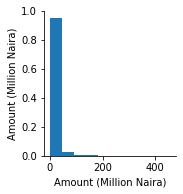

In [11]:
sns.pairplot(train)

## EDA

### VehicleID

In [12]:
VecID = train['VehicleID'].copy()

In [13]:
train['VehicleID'].head()

0    VHL12546
1    VHL18827
2    VHL19499
3    VHL17991
4    VHL12170
Name: VehicleID, dtype: object

In [14]:
train['VehicleID'].value_counts()

VHL16666    5
VHL18344    5
VHL13658    5
VHL16658    5
VHL17066    5
VHL14590    5
VHL12352    5
VHL19144    5
VHL12773    5
VHL16443    5
VHL12175    4
VHL19968    4
VHL16537    4
VHL18080    4
VHL19850    4
VHL15837    4
VHL12713    4
VHL12727    4
VHL10637    4
VHL10259    4
VHL14224    4
VHL11689    4
VHL14494    4
VHL16856    4
VHL19537    4
VHL19533    4
VHL12496    4
VHL15686    4
VHL14239    4
VHL15954    4
VHL19825    4
VHL16870    4
VHL16204    4
VHL14495    4
VHL16186    4
VHL19024    4
VHL11003    4
VHL15219    4
VHL18150    4
VHL15277    4
VHL15431    4
VHL12656    4
VHL10914    4
VHL12027    4
VHL15823    4
VHL10728    4
VHL11818    4
VHL19663    4
VHL16084    4
VHL13683    4
VHL19802    4
VHL10020    4
VHL16905    4
VHL15679    4
VHL10130    4
VHL18164    4
VHL11413    4
VHL17382    4
VHL16707    4
VHL11533    4
VHL18263    4
VHL14271    4
VHL11935    4
VHL11860    4
VHL13477    4
VHL14570    4
VHL14054    4
VHL12101    3
VHL19387    3
VHL16827    3
VHL18121    3
VHL165

In [15]:
drop_col = ['VehicleID']

In [16]:
drop_col

['VehicleID']

### Distance

In [17]:
Distance = train['Distance'].copy()

In [18]:
#train['Distance'] = Distance.copy()

In [19]:
train['Distance'].head()

0        NaN
1    125,000
2    110,852
3     30,000
4    125,206
Name: Distance, dtype: object

In [20]:
train['Distance'] = train['Distance'].replace(',', '', regex = True)
train['Distance'] = train['Distance'].apply(pd.to_numeric, errors = 'coerce')
train['Distance'].head()

0         NaN
1    125000.0
2    110852.0
3     30000.0
4    125206.0
Name: Distance, dtype: float64

In [21]:
test['Distance'] = test['Distance'].replace(',', '', regex = True)
test['Distance'] = test['Distance'].apply(pd.to_numeric, errors = 'coerce')
test['Distance'].head()

0     30524.0
1         NaN
2         NaN
3    166839.0
4     88862.0
Name: Distance, dtype: float64

In [22]:
train['Distance'].isnull().sum()

2360

In [23]:
train['Distance'].describe()

count    4.845000e+03
mean     1.031989e+05
std      1.182902e+05
min      1.000000e+00
25%      5.235200e+04
50%      8.083000e+04
75%      1.175840e+05
max      1.985400e+06
Name: Distance, dtype: float64

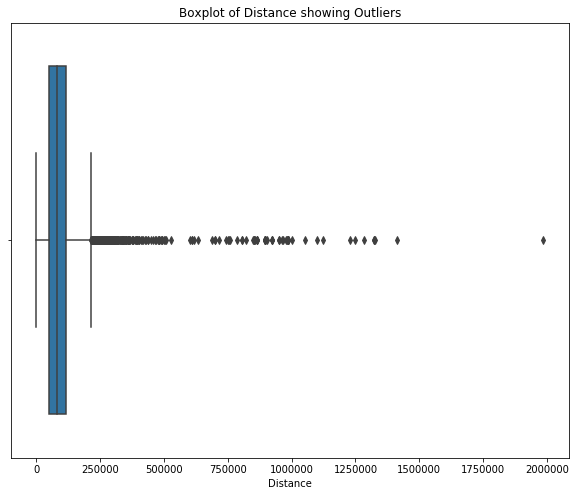

In [24]:
plt.figure(figsize =(10, 8))
sns.boxplot(train['Distance'])
plt.title("Boxplot of Distance showing Outliers")
plt.show()

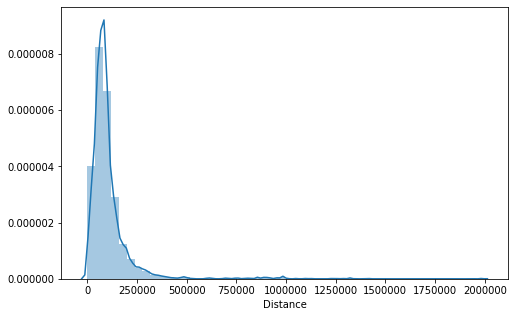

In [25]:
plt.figure(figsize=(8, 5))
sns.distplot(train['Distance'])
plt.show()

In [26]:
train.columns

Index(['VehicleID', 'Location', 'Maker', 'Model', 'Year', 'Colour',
       'Amount (Million Naira)', 'Type', 'Distance'],
      dtype='object')

Using the Z-score method to detect Outliers

In [27]:
# outliers = []
# def detect_outliers_zscore(data):
#     thres = 3
#     mean = np.mean(data)
#     std = np.std(data)
#     # print(mean, std)
#     for i in data:
#         z_score = (i-mean)/std
#         if (np.abs(z_score) > thres):
#             outliers.append(i)
#     return outliers# Driver code

# sample_outliers = detect_outliers_zscore(train['Distance'])
# print("Outliers from Z-scores method: ", sample_outliers)

Dropping Outliers Discovered by the zscore method

In [28]:
#train = train[train["Distance"]<min(sample_outliers)].reset_index(drop = True)

In [29]:
#Checking if there are still null values in the train column
train['Distance'].isnull().sum()

2360

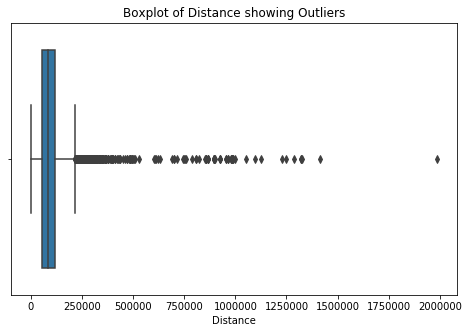

In [30]:
plt.figure(figsize =(8, 5))
sns.boxplot(train['Distance'])
plt.title("Boxplot of Distance showing Outliers")
plt.show()

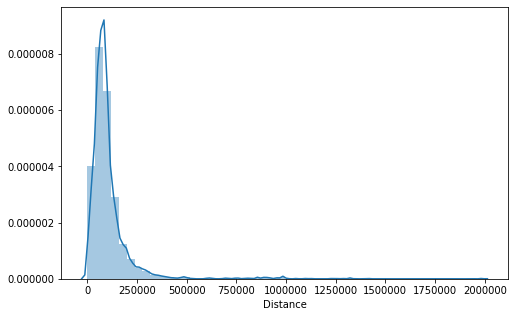

In [31]:
plt.figure(figsize=(8, 5))
sns.distplot(train['Distance'])
plt.show()

#### Check if removing more outliers can help.

In [32]:
outliers = []
def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers# Driver code

sample_outliers = detect_outliers_zscore(train['Distance'])
print("Outliers from Z-scores method: ", sample_outliers)

Outliers from Z-scores method:  [895236.0, 700010.0, 467397.0, 786123.0, 742111.0, 922382.0, 608752.0, 854236.0, 631970.0, 491836.0, 952388.0, 687452.0, 1413435.0, 823102.0, 963200.0, 1284898.0, 895231.0, 1230000.0, 754365.0, 985231.0, 805624.0, 471102.0, 980801.0, 925343.0, 850000.0, 1250000.0, 604158.0, 923500.0, 895421.0, 984512.0, 482800.0, 478621.0, 504000.0, 865421.0, 1321100.0, 965604.0, 509124.0, 865241.0, 526558.0, 482800.0, 895855.0, 714352.0, 758288.0, 619358.0, 482800.0, 980001.0, 895623.0, 987542.0, 1097611.0, 1052375.0, 491836.0, 1324810.0, 895412.0, 895421.0, 854337.0, 864542.0, 1321211.0, 750454.0, 856321.0, 482800.0, 487321.0, 700000.0, 1985400.0, 1123856.0, 807523.0, 902471.0, 985123.0, 985231.0, 458478.0, 499247.0, 610181.0, 985236.0, 999999.0, 952423.0, 987542.0]


In [33]:
train['Distance'].shape

(7205,)

In [34]:
Dist = train['Distance'].copy()

### Location

In [35]:
Location = train['Location'].copy

In [36]:
train['Location'].head()

0     Abuja
1    Ibadan
2     Lagos
3     Abuja
4    Ibadan
Name: Location, dtype: object

In [37]:
train['Location'].describe()

count      7205
unique        3
top       Lagos
freq       3318
Name: Location, dtype: object

In [38]:
train['Location'].value_counts()

Lagos     3318
Abuja     3263
Ibadan     624
Name: Location, dtype: int64

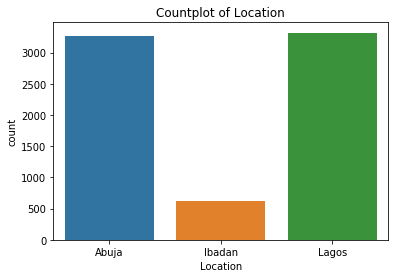

In [39]:
#sns.set_style('darkgrid')
#plt.figure(figsize=(8, 5))
sns.countplot(train['Location'])
plt.title('Countplot of Location')
plt.show()

In [40]:
obj_col = ['Location']
#obj_dtype= 
#train.select_dtypes(include=['object']).columns

In [41]:
train.columns

Index(['VehicleID', 'Location', 'Maker', 'Model', 'Year', 'Colour',
       'Amount (Million Naira)', 'Type', 'Distance'],
      dtype='object')

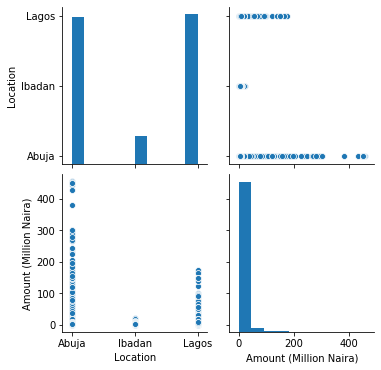

In [42]:
sns.pairplot(train, vars = ["Location", 'Amount (Million Naira)'])

## Maker

In [43]:
train['Maker'].head()

0            Honda
1          Hyundai
2            Lexus
3    Mercedes-Benz
4           Toyota
Name: Maker, dtype: object

In [44]:
train['Maker'].value_counts()

Toyota           2742
Lexus            1599
Mercedes-Benz    1213
Honda             358
Hyundai           162
Acura             154
Land Rover        124
Ford              120
BMW               111
Nissan            101
Peugeot            75
Kia                66
Volkswagen         54
Pontiac            30
Mazda              28
Dodge              24
Mitsubishi         23
Audi               23
Chevrolet          21
Jeep               18
Infiniti           18
Jaguar             12
Rolls-Royce        10
Mini                9
Suzuki              8
GMC                 8
Volvo               7
Cadillac            7
Porsche             7
Scion               7
Bentley             6
Maserati            6
Lincoln             6
Buick               5
Lamborghini         4
Chrysler            4
Opel                4
Rover               3
GAC                 3
Fiat                3
Renault             3
Saturn              2
Subaru              2
Citroen             2
JAC                 2
Hummer    

In [45]:
len(train['Maker'].value_counts())

55

In [46]:
obj_col.append('Maker')

## Model

In [47]:
train[['Model', 'Maker']].head()

,Model,Maker
0,Accord Coupe EX V-6,Honda
1,Sonata,Hyundai
2,RX 350,Lexus
3,GLE-Class,Mercedes-Benz
4,Highlander,Toyota


In [48]:
train['Model'].value_counts()

Camry                                         651
ES 350                                        300
Corolla                                       282
C300                                          199
RX                                            158
RX 350                                        145
Accord                                        132
M Class ML 350 4Matic                         114
RX 350 AWD                                    112
Highlander                                     96
M Class                                        95
E350                                           90
GLK-Class 350 4MATIC                           85
MDX                                            76
GLE-Class                                      74
ES                                             72
RAV4                                           71
Highlander Limited                             63
Sienna                                         57
GX 460 Luxury                                  55


In [49]:
len(train['Model'].value_counts())

1223

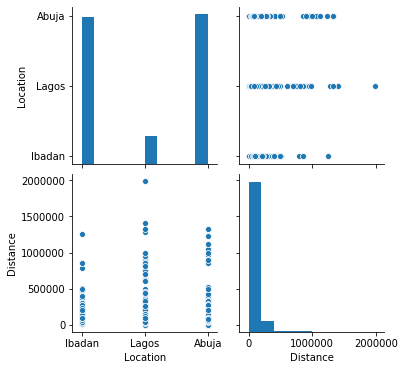

In [50]:
sns.pairplot(train, vars = ["Location", "Distance"])

In [51]:
obj_col.append('Model')

In [52]:
train.columns

Index(['VehicleID', 'Location', 'Maker', 'Model', 'Year', 'Colour',
       'Amount (Million Naira)', 'Type', 'Distance'],
      dtype='object')

### Year

In [53]:
Year = train['Year']

In [54]:
train['Year'].head()

0    2,011
1    2,012
2    2,010
3    2,017
4    2,002
Name: Year, dtype: object

In [214]:
test['Year'].head()

0    2,008
1    2,013
2    2,005
3    2,011
4    2,013
Name: Year, dtype: object

In [55]:
train['Year'] = train['Year'].replace(',', '', regex = True)
train['Year'].head()

0    2011
1    2012
2    2010
3    2017
4    2002
Name: Year, dtype: object

In [220]:
test['Year'] = test['Year'].replace(',', '', regex = True)
test['Year'].head()

0    2008.0
1    2013.0
2    2005.0
3    2011.0
4    2013.0
Name: Year, dtype: float64

In [56]:
train['Year'] = train['Year'].apply(pd.to_numeric, errors = 'coerce')

In [216]:
test['Year'] = test['Year'].apply(pd.to_numeric, errors = 'coerce')

In [57]:
train['Year'].dtype

dtype('float64')

In [58]:
train['Year'].head()

0    2011.0
1    2012.0
2    2010.0
3    2017.0
4    2002.0
Name: Year, dtype: float64

In [59]:
train['Year'] = pd.DataFrame(train['Year'])

In [60]:
train['Year'].dtype

dtype('float64')

In [61]:
#train['Year'] = train['Year'].astype('int64')

In [62]:
train['Year'].describe()

count    7184.000000
mean     2011.032712
std         4.853260
min      1979.000000
25%      2008.000000
50%      2011.000000
75%      2014.000000
max      2022.000000
Name: Year, dtype: float64

In [63]:
train['Year'].isnull().sum()

21

In [217]:
test['Year'].isnull().sum()

2

In [219]:
test['Year'].describe()

count    2059.000000
mean     2011.077222
std         4.967275
min      1982.000000
25%      2008.000000
50%      2011.000000
75%      2014.000000
max      2022.000000
Name: Year, dtype: float64

In [221]:
test['Year'].value_counts()

2008.0    194
2010.0    167
2013.0    161
2011.0    152
2014.0    144
2007.0    138
2012.0    127
2009.0    115
2015.0    113
2006.0     99
2017.0     95
2005.0     82
2016.0     74
2020.0     69
2004.0     63
2018.0     62
2019.0     52
2021.0     43
2003.0     35
2002.0     27
2001.0     18
2000.0      9
1999.0      8
1998.0      3
1997.0      3
2022.0      2
1986.0      2
1982.0      1
1991.0      1
Name: Year, dtype: int64

In [222]:
test['Year'].fillna(2008, inplace = True)

In [64]:
train['Year'].fillna(2010, inplace = True)

In [65]:
train['Year'].isnull().sum()

0

In [223]:
test['Year'].isnull().sum()

0

In [66]:
train.head()

,VehicleID,Location,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance
0,VHL12546,Abuja,Honda,Accord Coupe EX V-6,2011.0,Silver,2.2,Nigerian Used,NaN
1,VHL18827,Ibadan,Hyundai,Sonata,2012.0,Silver,3.5,Nigerian Used,125000.0
2,VHL19499,Lagos,Lexus,RX 350,2010.0,Red,9.2,Foreign Used,110852.0
3,VHL17991,Abuja,Mercedes-Benz,GLE-Class,2017.0,Blue,22.8,Foreign Used,30000.0
4,VHL12170,Ibadan,Toyota,Highlander,2002.0,Red,2.6,Nigerian Used,125206.0


In [67]:
train['Years of Use'] = 2022 - train['Year']
#2022 - train['Year']

In [224]:
test['Years of Use'] = 2022 - test['Year']

In [69]:
train[['Year', 'Years of Use']].head()

,Year,Years of Use
0,2011.0,11.0
1,2012.0,10.0
2,2010.0,12.0
3,2017.0,5.0
4,2002.0,20.0


GroupBy on Years of Use

In [207]:
df = train.groupby('VehicleID').agg(
    year_min = ("Years of Use", "min"),
    year_max = ("Years of Use", "max"),
    year_mean = ("Years of Use", "mean"),
    year_count = ("Years of Use", "count"),

).reset_index()

In [208]:
df.head()

,VehicleID,year_min,year_max,year_mean,year_count
0,VHL10002,3.0,3.0,3.0,1
1,VHL10003,4.0,4.0,4.0,1
2,VHL10006,4.0,4.0,4.0,1
3,VHL10009,12.0,12.0,12.0,1
4,VHL10012,13.0,13.0,13.0,1


In [210]:
df.shape

(5141, 5)

### Colour

In [70]:
train['Colour'].value_counts()

Black       2128
Gray        1152
Silver      1123
White       1019
Blue         554
Red          478
Gold         357
Green        179
Brown        114
Burgandy      27
Beige         25
Purple        16
Orange        11
Yellow         7
Pink           7
Ivory          3
Teal           1
Pearl          1
Violet         1
Mica           1
G              1
Name: Colour, dtype: int64

In [71]:
len(train['Colour'].value_counts())

21

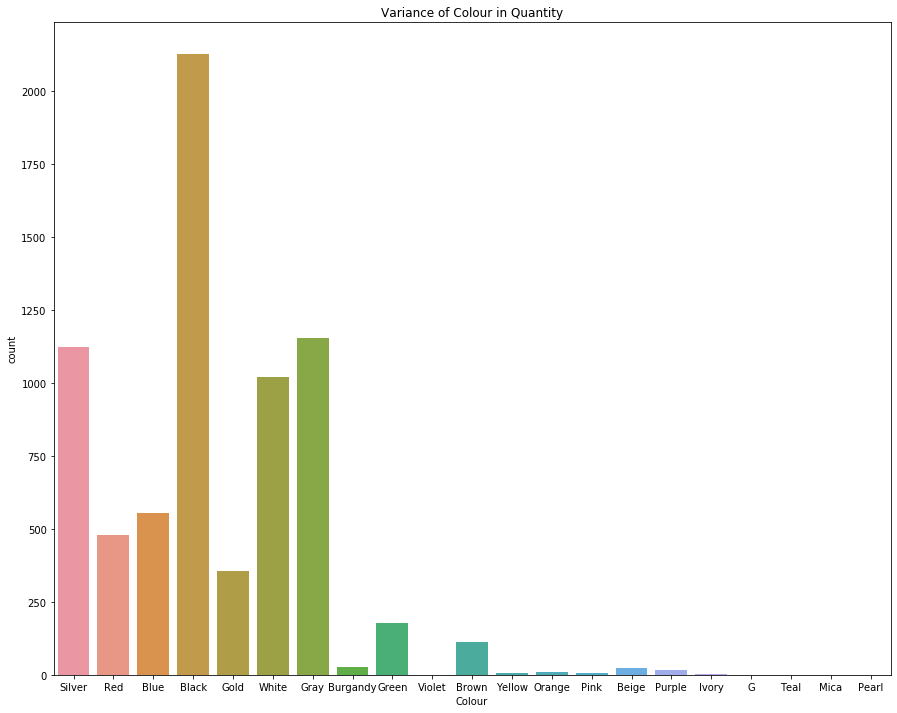

In [72]:
plt.figure(figsize=(15, 12))
sns.countplot(train['Colour'])
plt.title('Variance of Colour in Quantity')
plt.show()

In [73]:
train.columns

Index(['VehicleID', 'Location', 'Maker', 'Model', 'Year', 'Colour',
       'Amount (Million Naira)', 'Type', 'Distance', 'Years of Use'],
      dtype='object')

In [74]:
obj_col.append('Colour')

### Amount (Million Naira)

In [75]:
train['Amount (Million Naira)'].head()

0     2.2
1     3.5
2     9.2
3    22.8
4     2.6
Name: Amount (Million Naira), dtype: float64

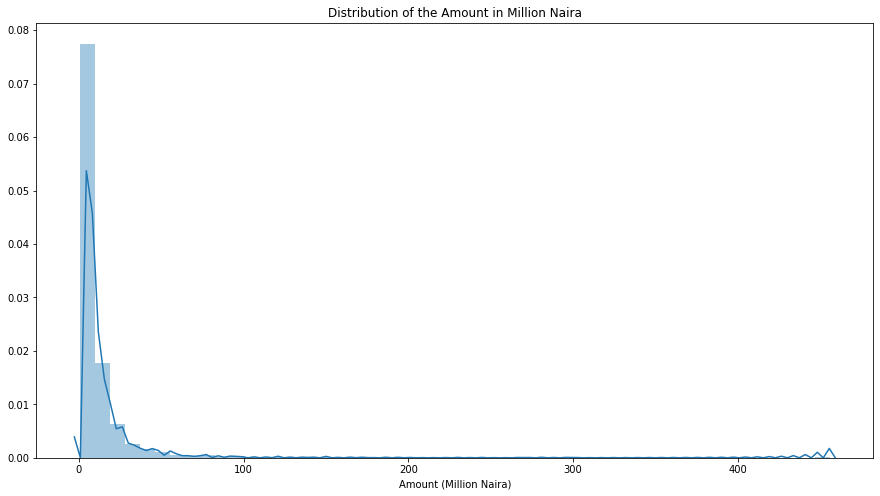

In [76]:
plt.figure(figsize = (15, 8))
sns.distplot(train['Amount (Million Naira)'])
plt.title('Distribution of the Amount in Million Naira')
plt.show()

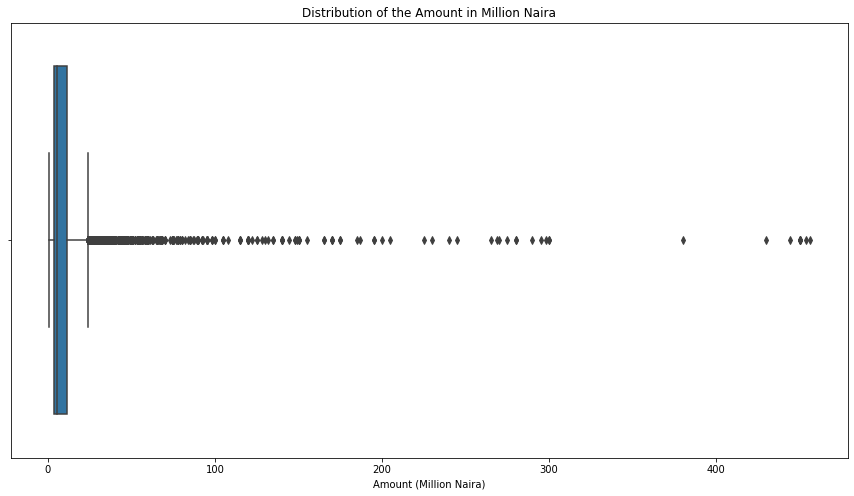

In [77]:
plt.figure(figsize = (15, 8))
sns.boxplot(train['Amount (Million Naira)'])
plt.title('Distribution of the Amount in Million Naira')
plt.show()

In [78]:
train['Amount (Million Naira)'].isnull().sum()

17

In [79]:
train['Amount (Million Naira)'].describe()

count    7188.000000
mean       11.847999
std        25.318922
min         0.450000
25%         3.500000
50%         5.650000
75%        11.662500
max       456.000000
Name: Amount (Million Naira), dtype: float64

In [80]:
train['Amount (Million Naira)'].skew()

9.779965790741855

In [81]:
train['Amount (Million Naira)'].fillna(method = 'ffill', inplace = True)

In [82]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7205 entries, 0 to 7204
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   VehicleID               7205 non-null   object 
 1   Location                7205 non-null   object 
 2   Maker                   7205 non-null   object 
 3   Model                   7205 non-null   object 
 4   Year                    7205 non-null   float64
 5   Colour                  7205 non-null   object 
 6   Amount (Million Naira)  7205 non-null   float64
 7   Type                    7008 non-null   object 
 8   Distance                4845 non-null   float64
 9   Years of Use            7205 non-null   float64
dtypes: float64(4), object(6)
memory usage: 563.0+ KB


In [83]:
train.describe()

,Year,Amount (Million Naira),Distance,Years of Use
count,7205.000000,7205.000000,4.845000e+03,7205.000000
mean,2011.029702,11.840021,1.031989e+05,10.970298
std,4.846501,25.291575,1.182902e+05,4.846501
min,1979.000000,0.450000,1.000000e+00,0.000000
25%,2008.000000,3.500000,5.235200e+04,8.000000
50%,2011.000000,5.650000,8.083000e+04,11.000000
75%,2014.000000,11.650000,1.175840e+05,14.000000
max,2022.000000,456.000000,1.985400e+06,43.000000


In [84]:
#sns.catplot()

In [85]:
#sns.catplot(x = train['Amount (Million Naira)'], y = train['Distance'])

In [86]:
train.isnull().sum()

VehicleID                    0
Location                     0
Maker                        0
Model                        0
Year                         0
Colour                       0
Amount (Million Naira)       0
Type                       197
Distance                  2360
Years of Use                 0
dtype: int64

In [87]:
train.shape

(7205, 10)

### Type

In [88]:
Type = train['Type'].copy()

In [89]:
train['Type'].head()

0    Nigerian Used
1    Nigerian Used
2     Foreign Used
3     Foreign Used
4    Nigerian Used
Name: Type, dtype: object

In [90]:
train['Type'].unique()

array(['Nigerian Used', 'Foreign Used', 'Brand New', nan], dtype=object)

In [91]:
train['Type'].value_counts()

Foreign Used     4896
Nigerian Used    1895
Brand New         217
Name: Type, dtype: int64

In [92]:
train['Type'].describe()

count             7008
unique               3
top       Foreign Used
freq              4896
Name: Type, dtype: object

In [95]:
#plt.plot(train['Type'], train['Amount (Million Naira)'])

In [97]:
train['Type'].fillna('Foreign Used', inplace = True)
test['Type'].fillna('Foreign Used', inplace = True)

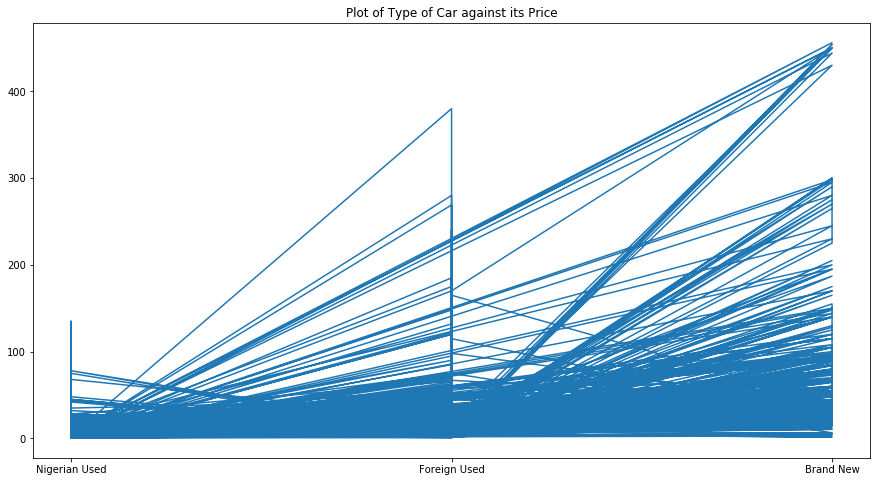

In [98]:
plt.figure(figsize = (15, 8))
plt.plot(train['Type'], train['Amount (Million Naira)'])
plt.title('Plot of Type of Car against its Price')
plt.show()

<Figure size 1080x576 with 0 Axes>

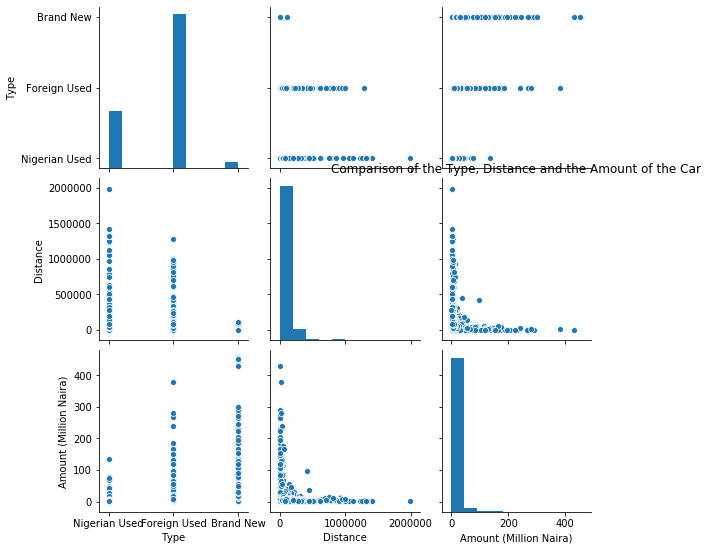

In [99]:
plt.figure(figsize = (15, 8))
sns.pairplot(train, vars = ["Type", "Distance", "Amount (Million Naira)"])
plt.title("Comparison of the Type, Distance and the Amount of the Car")
plt.show()

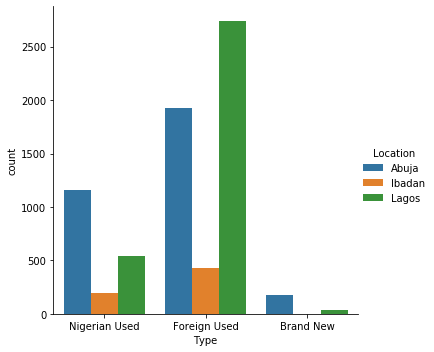

In [100]:
sns.catplot(x="Type", kind="count" ,data = train, hue = "Location")
plt.show()

In [ ]:
test['Type'].mode()

0    Foreign Used
dtype: object

In [ ]:
train['Type'].mode()

0    Foreign Used
dtype: object

In [101]:
train['Type'].isnull().sum()

0

In [102]:
obj_col.append("Type")

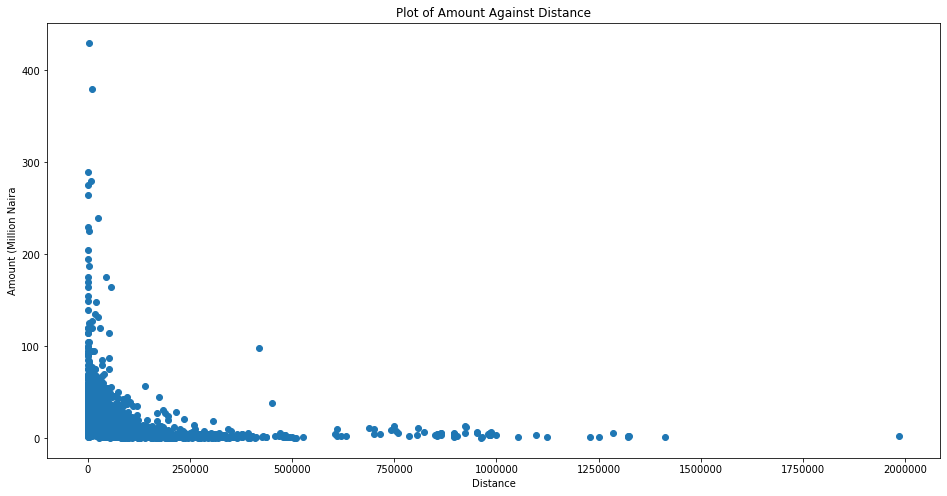

In [103]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(train['Distance'], train['Amount (Million Naira)'])
ax.set_xlabel('Distance')
ax.set_ylabel('Amount (Million Naira')
plt.title("Plot of Amount Against Distance")
plt.show()

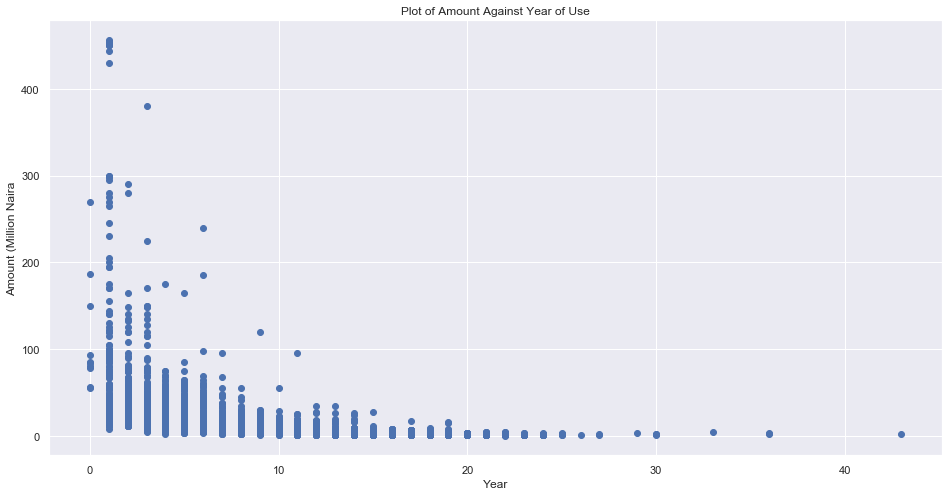

In [200]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(train['Years of Use'], train['Amount (Million Naira)'])
ax.set_xlabel('Year')
ax.set_ylabel('Amount (Million Naira')
plt.title("Plot of Amount Against Year of Use")
plt.show()

In [104]:
train.corr()

,Year,Amount (Million Naira),Distance,Years of Use
Year,1.000000,0.452524,-0.362435,-1.000000
Amount (Million Naira),0.452524,1.000000,-0.209105,-0.452524
Distance,-0.362435,-0.209105,1.000000,0.362435
Years of Use,-1.000000,-0.452524,0.362435,1.000000


In [105]:
from sklearn.preprocessing import LabelEncoder

In [106]:
train.head()

,VehicleID,Location,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance,Years of Use
0,VHL12546,Abuja,Honda,Accord Coupe EX V-6,2011.0,Silver,2.2,Nigerian Used,NaN,11.0
1,VHL18827,Ibadan,Hyundai,Sonata,2012.0,Silver,3.5,Nigerian Used,125000.0,10.0
2,VHL19499,Lagos,Lexus,RX 350,2010.0,Red,9.2,Foreign Used,110852.0,12.0
3,VHL17991,Abuja,Mercedes-Benz,GLE-Class,2017.0,Blue,22.8,Foreign Used,30000.0,5.0
4,VHL12170,Ibadan,Toyota,Highlander,2002.0,Red,2.6,Nigerian Used,125206.0,20.0


In [107]:
train.columns

Index(['VehicleID', 'Location', 'Maker', 'Model', 'Year', 'Colour',
       'Amount (Million Naira)', 'Type', 'Distance', 'Years of Use'],
      dtype='object')

In [108]:
obj_col

['Location', 'Maker', 'Model', 'Colour', 'Type']

In [153]:
train['VehicleID'].value_counts()

VHL16666    5
VHL18344    5
VHL13658    5
VHL16658    5
VHL17066    5
VHL14590    5
VHL12352    5
VHL19144    5
VHL12773    5
VHL16443    5
VHL12175    4
VHL19968    4
VHL16537    4
VHL18080    4
VHL19850    4
VHL15837    4
VHL12713    4
VHL12727    4
VHL10637    4
VHL10259    4
VHL14224    4
VHL11689    4
VHL14494    4
VHL16856    4
VHL19537    4
VHL19533    4
VHL12496    4
VHL15686    4
VHL14239    4
VHL15954    4
VHL19825    4
VHL16870    4
VHL16204    4
VHL14495    4
VHL16186    4
VHL19024    4
VHL11003    4
VHL15219    4
VHL18150    4
VHL15277    4
VHL15431    4
VHL12656    4
VHL10914    4
VHL12027    4
VHL15823    4
VHL10728    4
VHL11818    4
VHL19663    4
VHL16084    4
VHL13683    4
VHL19802    4
VHL10020    4
VHL16905    4
VHL15679    4
VHL10130    4
VHL18164    4
VHL11413    4
VHL17382    4
VHL16707    4
VHL11533    4
VHL18263    4
VHL14271    4
VHL11935    4
VHL11860    4
VHL13477    4
VHL14570    4
VHL14054    4
VHL12101    3
VHL19387    3
VHL16827    3
VHL18121    3
VHL165

In [198]:
len(train['Year'].value_counts())

33

## Exploring the Years of Use

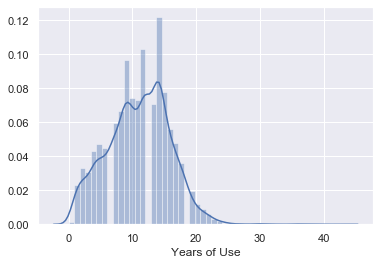

In [201]:
sns.distplot(train['Years of Use'])
plt.show()

In [ ]:
#df = train.groupby('VehicleID')

In [211]:
# df['mean_years'] = train.groupby('VehicleID').mean()['Years of Use']
# df['mean_years'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: mean_years, dtype: float64

In [212]:
#df.mean_years.isnull().sum()

5141

A Copy of the train and test dataset

In [225]:
df = train.copy()
df1 = test.copy()

In [226]:
df.shape, df1.shape

((7205, 10), (2061, 9))

In [228]:
df.head()

,VehicleID,Location,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance,Years of Use
0,VHL12546,Abuja,Honda,Accord Coupe EX V-6,2011.0,Silver,2.2,Nigerian Used,NaN,11.0
1,VHL18827,Ibadan,Hyundai,Sonata,2012.0,Silver,3.5,Nigerian Used,125000.0,10.0
2,VHL19499,Lagos,Lexus,RX 350,2010.0,Red,9.2,Foreign Used,110852.0,12.0
3,VHL17991,Abuja,Mercedes-Benz,GLE-Class,2017.0,Blue,22.8,Foreign Used,30000.0,5.0
4,VHL12170,Ibadan,Toyota,Highlander,2002.0,Red,2.6,Nigerian Used,125206.0,20.0


In [227]:
df1.head()

,VehicleID,Location,Maker,Model,Year,Colour,Type,Distance,Years of Use
0,VHL18518,Abuja,BMW,323i,2008.0,White,Foreign Used,30524.0,14.0
1,VHL17149,Lagos,Toyota,Camry,2013.0,White,Foreign Used,NaN,9.0
2,VHL10927,Lagos,Toyota,Highlander Limited V6,2005.0,Gold,Foreign Used,NaN,17.0
3,VHL12909,Lagos,Toyota,Camry,2011.0,Gray,Foreign Used,166839.0,11.0
4,VHL12348,Lagos,Lexus,ES 350 FWD,2013.0,Red,Foreign Used,88862.0,9.0


In [180]:
#df['Distance'].dropna()

In [229]:
df = df.drop(columns = 'VehicleID', axis = 1)
df1 = df1.drop(columns = 'VehicleID', axis = 1)

In [230]:
for col in obj_col:
  lr = LabelEncoder()
  df[col] = lr.fit_transform(df[col])
  df1[col] = lr.fit_transform(df1[col])

In [185]:
df.head()

,Location,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance,Years of Use
0,0,17,117,2011.0,16,2.2,2,NaN,11.0
1,1,19,1049,2012.0,16,3.5,2,125000.0,10.0
2,2,29,908,2010.0,15,9.2,1,110852.0,12.0
3,0,34,508,2017.0,2,22.8,1,30000.0,5.0
4,1,52,569,2002.0,15,2.6,2,125206.0,20.0


In [232]:
df1.isnull().sum()

Location          0
Maker             0
Model             0
Year              0
Colour            0
Type              0
Distance        676
Years of Use      0
dtype: int64

In [231]:
df.isnull().sum()

Location                     0
Maker                        0
Model                        0
Year                         0
Colour                       0
Amount (Million Naira)       0
Type                         0
Distance                  2360
Years of Use                 0
dtype: int64

In [116]:
total = df.isnull().sum().sort_values(ascending=False)
percentage = ((df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)*100)
missing_data = pd.concat([total, percentage], axis=1, keys=['Total', 'Percentage'])
missing_data.head(20)

,Total,Percentage
Distance,2360,32.755031
Years of Use,0,0.000000
Type,0,0.000000
Amount (Million Naira),0,0.000000
Colour,0,0.000000
Year,0,0.000000
Model,0,0.000000
Maker,0,0.000000
Location,0,0.000000


In [187]:
train['Distance'].describe()

count    4.845000e+03
mean     1.031989e+05
std      1.182902e+05
min      1.000000e+00
25%      5.235200e+04
50%      8.083000e+04
75%      1.175840e+05
max      1.985400e+06
Name: Distance, dtype: float64

In [118]:
train['Distance'].mean()

103198.90361197111

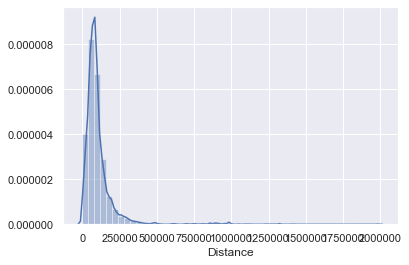

In [158]:
sns.distplot(train['Distance'])

In [188]:
df['Distance'].isnull().sum()

2360

In [234]:
df1['Distance'].isnull().sum()

676

In [233]:
df1['Distance'] = df1['Distance'].dropna()

In [190]:
df['Distance'] = df['Distance'].dropna()
#df1['Distance'].dropna()


In [191]:
df.shape, df1.shape

((7205, 9), (2061, 8))

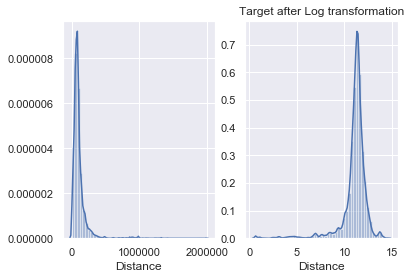

In [166]:
sns.set()
dist = df["Distance"]
dist_transformed = pd.Series(np.log1p(dist))

fig, ax = plt.subplots(1, 2)
sns.distplot(dist, ax=ax[0])
plt.title("Distance after Log transformation")
# ax[0].axvline(y_transformed)
sns.distplot(dist_transformed, ax=ax[1])
plt.show()

In [236]:
df['Distance'].fillna(df['Distance'].mean(), inplace = True)

df1['Distance'].fillna(df1['Distance'].mean(), inplace = True)

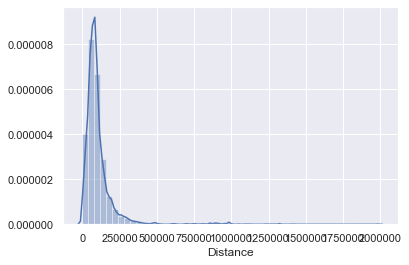

In [235]:
sns.distplot(df['Distance'])
plt.show()

## Modelling

In [258]:
X = df.drop(columns=["Amount (Million Naira)", 'Year'])
y = df['Amount (Million Naira)']

In [238]:
X_test = df1.drop(columns=['Year'])

In [239]:
X_test.head()

,Location,Maker,Model,Colour,Type,Distance,Years of Use
0,0,2,8,16,1,30524.000000,14.0
1,2,37,123,16,1,103800.668592,9.0
2,2,37,272,7,1,103800.668592,17.0
3,2,37,123,8,1,166839.000000,11.0
4,2,20,192,12,1,88862.000000,9.0


In [240]:
X.head()

,Location,Maker,Model,Colour,Type,Distance,Years of Use
0,0,17,117,16,2,103198.903612,11.0
1,1,19,1049,16,2,125000.000000,10.0
2,2,29,908,15,1,110852.000000,12.0
3,0,34,508,2,1,30000.000000,5.0
4,1,52,569,15,2,125206.000000,20.0


In [256]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, StratifiedKFold

In [250]:
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

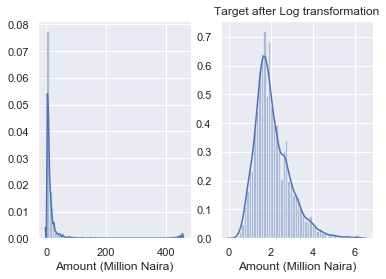

In [128]:
sns.set()
y = df["Amount (Million Naira)"]
y_transformed = pd.Series(np.log1p(y))

fig, ax = plt.subplots(1, 2)
sns.distplot(y, ax=ax[0])
plt.title("Target after Log transformation")
# ax[0].axvline(y_transformed)
sns.distplot(y_transformed, ax=ax[1])
plt.show()

In [243]:
fold_pred=[]
oof_pred = []

params = {
 'learning_rate': 0.1,
 'max_depth': 8,
 'n_estimators' : 2000,
 'use_best_model': True
 }




fold= KFold(n_splits = 10)#15#5#10
i=1
for train_index, test_index in fold.split(X,y):     
  
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = np.log1p(y.iloc[train_index]), y.iloc[test_index]

    model = CatBoostRegressor(**params, eval_metric = 'RMSE')
    model.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=300, verbose = False)#erly100

    preds= model.predict(X_test)
    print("RMSE: ", np.sqrt(mean_squared_error(y_test, np.expm1(preds))))  #Reverse transformation
    oof_pred.append(np.sqrt(mean_squared_error(y_test, np.expm1(preds))))
    p2 = model.predict(df1[X.columns])
    fold_pred.append(np.expm1(p2))
    

print(np.mean(oof_pred))

RMSE:  8.522136668129141
RMSE:  6.53707058127168
RMSE:  11.367802386337976
RMSE:  14.51601824705243
RMSE:  9.529288314582045
RMSE:  10.060340294100268
RMSE:  14.306833632977606
RMSE:  11.094483025872057
RMSE:  14.960876267592027
RMSE:  15.959396819646084
11.68542462375613


In [251]:
fold_pred=[]
oof_pred = []

params = {
 'learning_rate': 0.1,
 'max_depth': 8,
 'n_estimators' : 2000,
 'use_best_model': True
 }




fold= KFold(n_splits = 10)#15#5#10
i=1
for train_index, test_index in fold.split(X,y):     
  
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = np.log1p(y.iloc[train_index]), y.iloc[test_index]

    model = LGBMRegressor(**params, eval_metric = 'RMSE')
    model.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=300, verbose = False)#erly100

    preds= model.predict(X_test)
    print("RMSE: ", np.sqrt(mean_squared_error(y_test, np.expm1(preds))))  #Reverse transformation
    oof_pred.append(np.sqrt(mean_squared_error(y_test, np.expm1(preds))))
    p2 = model.predict(df1[X.columns])
    fold_pred.append(np.expm1(p2))
    

print(np.mean(oof_pred))

RMSE:  7.192313735239702
RMSE:  6.630535887254047
RMSE:  12.545491967367813
RMSE:  13.738866526911773
RMSE:  11.033905536437068
RMSE:  11.220065693926118
RMSE:  14.888818848102272
RMSE:  11.454014522169443
RMSE:  13.895585948691311
RMSE:  15.653923442841341
11.825352210894089


Text(0.5, 1.0, 'CatboostClassifier features importance:')

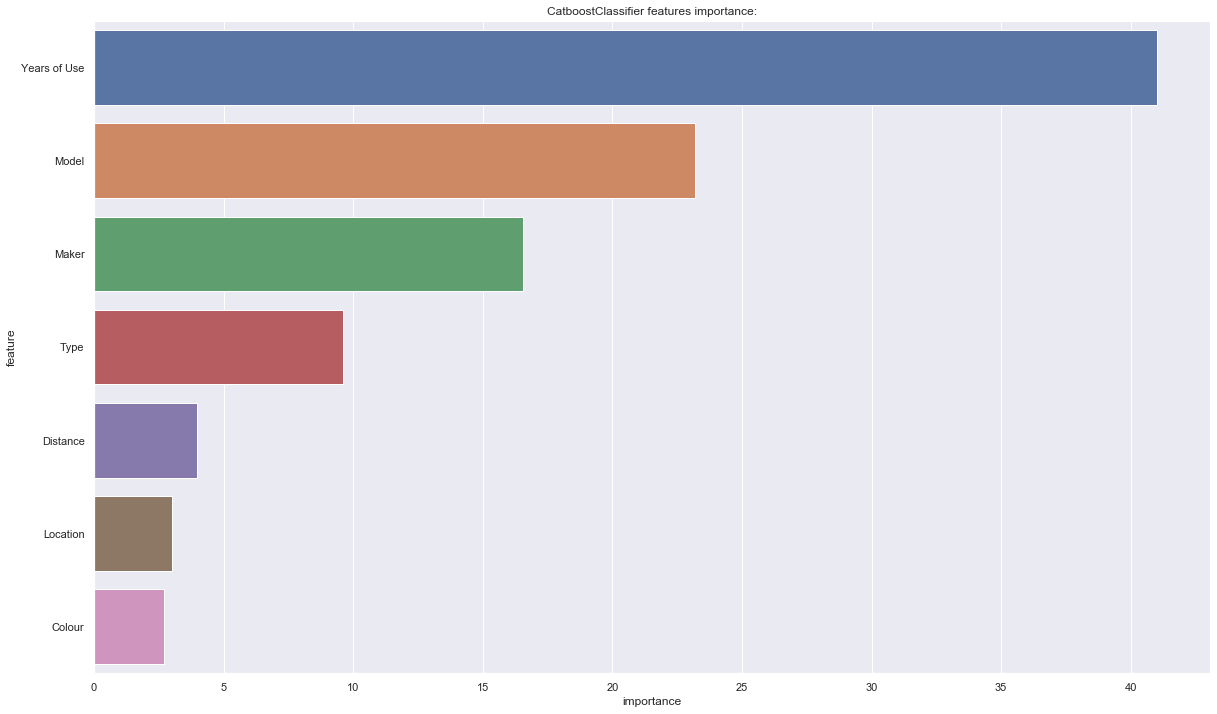

In [244]:
feature_importance_df = pd.DataFrame(model.feature_importances_, columns=['importance'])
feature_importance_df['feature'] = X.columns

plt.figure(figsize=(20, 12));
sns.barplot(x="importance", y="feature", data=feature_importance_df.sort_values(by = ['importance'], ascending = False).head(60))
plt.title('CatboostClassifier features importance:')

Text(0.5, 1.0, 'LGBMClassifier features importance:')

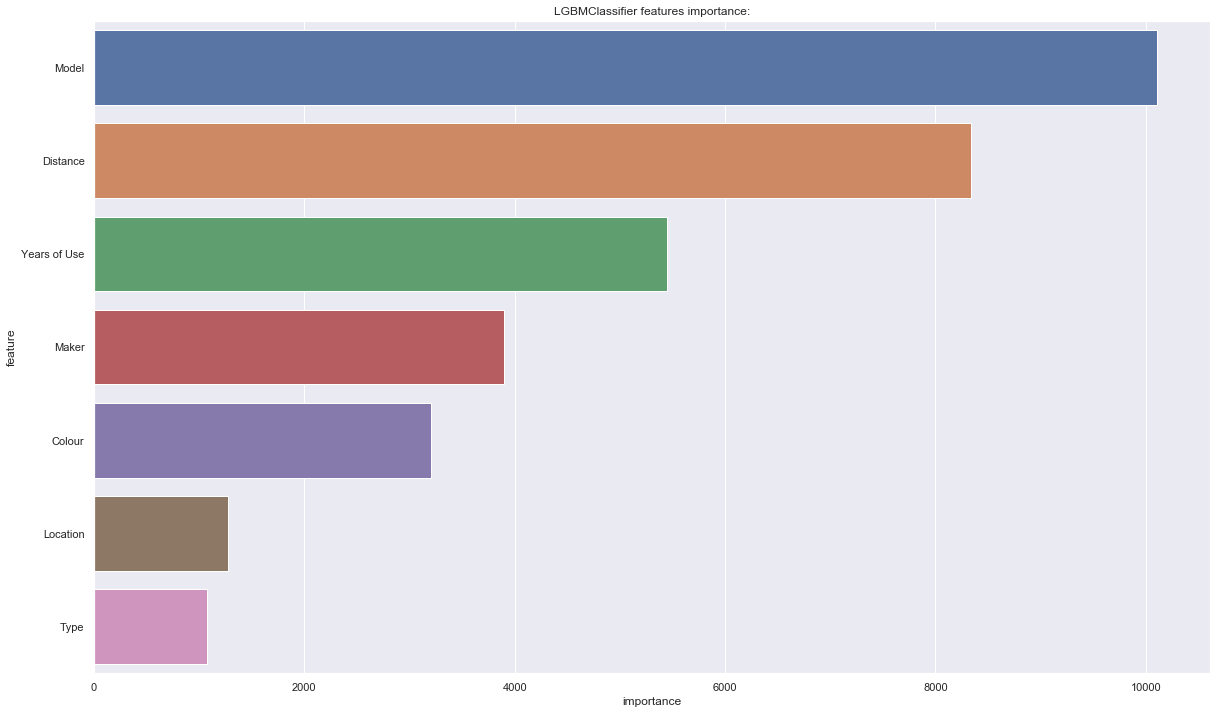

In [252]:
feature_importance_df = pd.DataFrame(model.feature_importances_, columns=['importance'])
feature_importance_df['feature'] = X.columns

plt.figure(figsize=(20, 12));
sns.barplot(x="importance", y="feature", data=feature_importance_df.sort_values(by = ['importance'], ascending = False).head(60))
plt.title('LGBMClassifier features importance:')

## Submission

In [136]:
sub = pd.read_csv("SampleSubmission.csv")

In [253]:
sub['Amount (Million Naira)'] =  np.mean(fold_pred, axis = 0)

In [254]:
sub.head()

,VehicleID,Amount (Million Naira)
0,VHL18518,3.271104
1,VHL17149,4.600854
2,VHL10927,2.266883
3,VHL12909,3.060578
4,VHL12348,7.324204


In [255]:
sub.to_csv('lgb1.csv', index = False)

In [245]:
fold_pred

[array([3.01925796, 4.8448938 , 1.99888152, ..., 6.65421247, 6.88994832,
        5.13456931]),
 array([4.04886774, 4.26496399, 1.79367054, ..., 6.07686809, 6.03212254,
        4.4129414 ]),
 array([2.92000224, 4.40103083, 1.96906441, ..., 7.03352255, 5.46473147,
        4.4753309 ]),
 array([2.81809991, 4.0529044 , 1.94233467, ..., 7.02177127, 5.28021717,
        4.87808728]),
 array([3.48155479, 4.83621691, 2.02740288, ..., 6.44480236, 6.25562912,
        5.4746651 ]),
 array([3.03511903, 4.39858262, 1.9905947 , ..., 7.12018196, 6.01866827,
        4.9676384 ]),
 array([3.1775296 , 4.67273073, 1.88340412, ..., 6.57158957, 6.49323832,
        4.85090305]),
 array([2.80013629, 3.67697181, 1.96611692, ..., 6.2259515 , 5.13109869,
        4.82558947]),
 array([2.63414223, 4.56642663, 2.06961002, ..., 7.14561973, 5.12429203,
        5.23520593]),
 array([2.82278408, 4.1643485 , 1.97137261, ..., 5.9082619 , 4.70076725,
        4.57506692])]

In [261]:
predictions = pd.DataFrame(y_pred_totcb2)

In [263]:
y_pred_totcb2

[]